### Student Information
Name: 卓榮祥

Student ID: 111062678

GitHub ID: Daniel88072797

Kaggle name: Daniel0727

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

# report

### import module

In [1]:
import pandas as pd
import numpy as np
import nltk
import neattext.functions as nfx

事先已經將row data整理成training set 和 testing set並各自存入pickle中，因此這一步驟是從pickle file將training 、testing data set讀取出來轉換成dataframe

In [2]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### Exploratory data analysis (EDA)

觀察dataframe中個別情緒的頻率

In [4]:
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

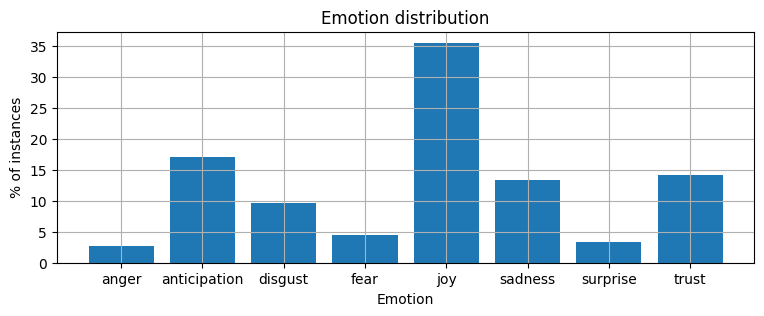

In [7]:
#emotion distribution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()  #unique去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的列表
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3)) #get percentage
# df1

#plot

fig, ax = plt.subplots(figsize=(9,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True) #格線
plt.show()

### Data preprocessing

移除text中與情緒無關的元素，如 $、%、&、+ 等

In [8]:
train_df['clean_Text'] = train_df['text'].str.replace('#','')
train_df['clean_Text'] = train_df['clean_Text'].str.replace("$","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace("%","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace("&","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace("'","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace("-","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace("/","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('@[^\s]+',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('http[^\s]+',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace(',',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('(',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace(')',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('\d+', '')
train_df['clean_Text'] = train_df['clean_Text'].str.replace("''","")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('*',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('+',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('.',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('_'," ")
train_df['clean_Text'] = train_df['clean_Text'].str.replace('=',"")
train_df['clean_Text'] = train_df['clean_Text'].str.replace(':',"")

C:\Users\user\AppData\Local\Temp\ipykernel_28776\744354265.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['clean_Text'] = train_df['clean_Text'].str.replace("$","")
C:\Users\user\AppData\Local\Temp\ipykernel_28776\744354265.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['clean_Text'] = train_df['clean_Text'].str.replace('@[^\s]+',"")
C:\Users\user\AppData\Local\Temp\ipykernel_28776\744354265.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['clean_Text'] = train_df['clean_Text'].str.replace('http[^\s]+',"")
C:\Users\user\AppData\Local\Temp\ipykernel_28776\744354265.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character 

查看data cleaning 前後的變化

In [12]:
train_df.head()

,tweet_id,identification,emotion,hashtags,text,clean_Text
0,0x29e452,train,joy,[],Huge Respect🖒 @JohnnyVegasReal talking about l...,Huge Respect🖒 talking about losing his dad to...
1,0x2b3819,train,joy,"['spateradio', 'app']",Yoooo we hit all our monthly goals with the ne...,Yoooo we hit all our monthly goals with the ne...
2,0x2a2acc,train,trust,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,Well done team 🌟 of every one of you
3,0x2a8830,train,joy,"['PUBG', 'GamersUnite', 'twitch', 'BeHealthy',...",Come join @ambushman27 on #PUBG while he striv...,Come join on PUBG while he strives for chicke...
4,0x20b21d,train,anticipation,"['strength', 'bones', 'God']",@fanshixieen2014 Blessings!My #strength little...,Blessings!My strength little My bones brittle...


### 利用 CountVectorizer 做 embedding 
做實驗時，我分別將有進行data cleaning (clean_Text) 和沒進行data cleaning (text)的text data分別丟入model中比較其精準度的差異，丟入testing set做預測時發現沒進行data cleaning (text)的precision較高!

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

BOW = CountVectorizer(tokenizer = nltk.word_tokenize, stop_words='english')
BOW.fit(train_df['clean_Text'])
# BOW.fit(train_df['text'])

X_train = BOW.transform(train_df['clean_Text'])
# X_train = BOW.transform(train_df['text'])

y_train = train_df['emotion']
X_test = BOW.transform(test_df['text'])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


而model採用的是 logistic regression，目標是在空間中找到一條直線將資料做分類，除了一般的two classes的classification外，也可以處理多個classes的classification

先前有利用 Deep Neural Network (DNN)、decision tree、Naive Bayes 的model進行training，而最終發現利用 Logistic Regression model預測出的 precision相較上述model高一些

In [14]:
from sklearn.linear_model import LogisticRegression

進行training!

In [15]:
model = LogisticRegression(penalty='l2')
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

predict training data

In [16]:
y_train_pred = model.predict(X_train)

查看predict accurracy

In [17]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))  #round到小數點後第二位

training accuracy: 0.54
